# Campus Placement Predictor

Importing required libraries for data analyis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Reading dataset

In [2]:
df = pd.read_csv('C:\\Users\\sidhj\\Downloads\\campus_placement.csv')

Attributes:
sl_no = Serial Number, gender = Gender, ssc_p = Secondary Education Percentage, ssc_b = Board of Secondary Education, hsc_p = Higher Secondary Education Percentage, hsc_b = Board of Higher Secondary Education, hsc_s = Specialisation in Higher Secondary Education, degree_p = UG Degree Percentage, degree_t = Type(Field) of UG degree, workex = Work Experience, etest_p = Test Percentage, specialisation = Branch Specialisation, mba_p = MBA Percentage

We will develop a Machine Learning model capable of determining whether an individual, based on the provided data, will secure a job placement.

So, Lets begin with the model!

### Exploratory Data Analysis (EDA)

Displaying dataset

In [3]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Determining size of dataset

In [4]:
df.shape

(4879, 15)

Describing dataset

In [5]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,4879.000000,4879.000000,4879.000000,4879.000000,4879.000000,4879.000000,2008.000000
mean,2440.000000,72.305130,65.611238,59.783677,66.820086,60.864448,284736.232072
std,1408.590312,16.510713,17.847544,10.905358,13.410135,7.584622,95798.915692
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,1220.500000,59.610000,51.880000,50.000000,55.590000,54.170000,237721.500000
50%,2440.000000,76.300000,64.890000,56.050000,64.490000,59.960000,275000.000000
75%,3659.500000,89.400000,78.615000,66.890000,75.845000,66.410000,305295.500000
max,4879.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


Number of Placed vs Not Placed students

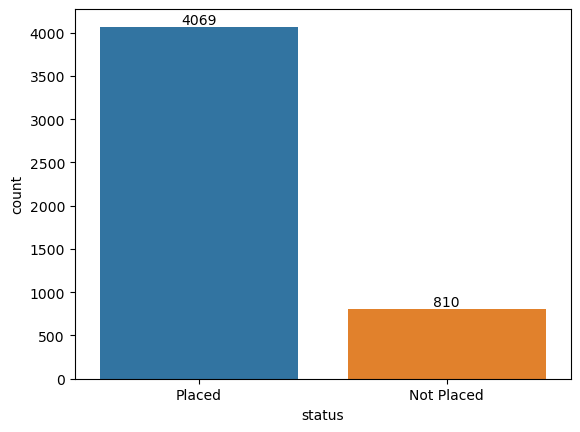

In [6]:
ax = sns.countplot(x='status', data=df)
ax.bar_label(ax.containers[0])
plt.show()

### Data Preprocessing

In this model, the sl_no and salary columns are not required since our focus is solely on predicting whether a student will be placed or not. Therefore, we will create a new dataframe without including these columns.

In [7]:
data = df.drop(['sl_no', 'salary'], axis=1)
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


Checking if any column contains missing values

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4879 entries, 0 to 4878
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          4879 non-null   object 
 1   ssc_p           4879 non-null   float64
 2   ssc_b           4879 non-null   object 
 3   hsc_p           4879 non-null   float64
 4   hsc_b           4879 non-null   object 
 5   hsc_s           4879 non-null   object 
 6   degree_p        4879 non-null   float64
 7   degree_t        4879 non-null   object 
 8   workex          4879 non-null   object 
 9   etest_p         4879 non-null   float64
 10  specialisation  4879 non-null   object 
 11  mba_p           4879 non-null   float64
 12  status          4879 non-null   object 
dtypes: float64(5), object(8)
memory usage: 495.6+ KB


Observing that certain columns do not consist of numerical values, it becomes important to determine the number of unique values in each column. This will aid in selecting an appropriate encoding method for categorical columns, considering that most machine learning models operate effectively with numerical data.

In [9]:
pd.Series({c: data[c].unique().size for c in data})

gender               2
ssc_p             2289
ssc_b                2
hsc_p             2926
hsc_b                2
hsc_s                3
degree_p          2034
degree_t             3
workex               2
etest_p           2628
specialisation       2
mba_p             1963
status               2
dtype: int64

Upon observation, it is apparent that the columns 'gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation' and 'status' exhibit a limited number of unique values, ranging from two to three. Consequently, these columns are well-suited for One-Hot Encoding. Therefore, applying One-Hot Encoding to these columns.

Encoding columns having two unique values:

In [10]:
data['gender'] = data['gender'].map({'M':1,'F':0})
data['ssc_b'] = data['ssc_b'].map({'Central':1,'Others':0})
data['hsc_b'] = data['hsc_b'].map({'Central':1,'Others':0})
data['workex'] = data['workex'].map({'Yes':1,'No':0})
data['specialisation'] = data['specialisation'].map({'Mkt&HR':1,'Mkt&Fin':0})
data['status'] = data['status'].map({'Placed':1,'Not Placed':0})

Now, Encoding columns having three unique values:

In [11]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
feature_array = ohe.fit_transform(data[["degree_t", "hsc_s"]]).toarray()

In [12]:
feature_labels = ohe.categories_
feature_labels = np.array(feature_labels).ravel()

In [13]:
features = pd.DataFrame(feature_array, columns = feature_labels)

In [14]:
data_new = pd.concat([data, features], axis=1)
data_new.drop(['hsc_s', 'degree_t'], axis=1, inplace=True)
data_new.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,Comm&Mgmt,Others,Sci&Tech,Arts,Commerce,Science
0,1,67.00,0,91.00,0,58.00,0,55.0,1,58.80,1,0.0,0.0,1.0,0.0,1.0,0.0
1,1,79.33,1,78.33,0,77.48,1,86.5,0,66.28,1,0.0,0.0,1.0,0.0,0.0,1.0
2,1,65.00,1,68.00,1,64.00,0,75.0,0,57.80,1,1.0,0.0,0.0,1.0,0.0,0.0
3,1,56.00,1,52.00,1,52.00,0,66.0,1,59.43,0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,85.80,1,73.60,1,73.30,0,96.8,0,55.50,1,1.0,0.0,0.0,0.0,1.0,0.0


Storing Feature Matrix In X and Response(Target) in Vector y

In [15]:
X = data_new.drop('status',axis=1)
y = data_new['status']

Splitting the dataset into the Training Set and Test Set

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

Now let's perform Machine Learning Classification. We'll be predicting the status based on the given features.

### Model Selection

We will use several popular models and see how they perform on our dataset. At the end we will choose the best performing model.

Importing models

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from xgboost import plot_tree

Creating a Predefined function to assess the performance of a model

In [18]:
def performance(model):
    
    model.fit(X_train, y_train)
    y_train_hat = model.predict(X_train)
    y_test_hat = model.predict(X_test)

    print(model)
    print('Train performance')
    print('-------------------------------------------------------')
    print(classification_report(y_train, y_train_hat))

    print('Test performance')
    print('-------------------------------------------------------')
    print(classification_report(y_test, y_test_hat))

    print('Roc_auc score')
    print('-------------------------------------------------------')
    print(roc_auc_score(y_test, y_test_hat))
    print('')

    print('Confusion matrix')
    print('-------------------------------------------------------')
    print(confusion_matrix(y_test, y_test_hat))

Next, we will train the models individually and evaluate their performance on our dataset.

In [19]:
# Logistic Regression
lr = LogisticRegression(random_state=0)
performance(lr)

LogisticRegression(random_state=0)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.61      0.04      0.07       646
           1       0.84      1.00      0.91      3257

    accuracy                           0.84      3903
   macro avg       0.72      0.52      0.49      3903
weighted avg       0.80      0.84      0.77      3903

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.36      0.02      0.05       164
           1       0.83      0.99      0.91       812

    accuracy                           0.83       976
   macro avg       0.60      0.51      0.48       976
weighted avg       0.76      0.83      0.76       976

Roc_auc score
-------------------------------------------------------
0.5078847771236333

Confusion matrix
-------------------------------------------------------
[

In [20]:
# Support Vector Classifier
svc = SVC(random_state=0)
performance(svc)

SVC(random_state=0)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       646
           1       0.83      1.00      0.91      3257

    accuracy                           0.83      3903
   macro avg       0.42      0.50      0.45      3903
weighted avg       0.70      0.83      0.76      3903

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       164
           1       0.83      1.00      0.91       812

    accuracy                           0.83       976
   macro avg       0.42      0.50      0.45       976
weighted avg       0.69      0.83      0.76       976

Roc_auc score
-------------------------------------------------------
0.5

Confusion matrix
-------------------------------------------------------
[[  0 164]
 [  0 812]]


In [21]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=0)
performance(dtc)

DecisionTreeClassifier(random_state=0)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       646
           1       1.00      1.00      1.00      3257

    accuracy                           1.00      3903
   macro avg       1.00      1.00      1.00      3903
weighted avg       1.00      1.00      1.00      3903

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.24      0.25      0.24       164
           1       0.85      0.84      0.84       812

    accuracy                           0.74       976
   macro avg       0.54      0.54      0.54       976
weighted avg       0.75      0.74      0.74       976

Roc_auc score
-------------------------------------------------------
0.5449507389162562

Confusion matrix
-----------------------------------------------------

In [22]:
# Random Forest Classifier
rfc = RandomForestClassifier()
performance(rfc)

RandomForestClassifier()
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       646
           1       1.00      1.00      1.00      3257

    accuracy                           1.00      3903
   macro avg       1.00      1.00      1.00      3903
weighted avg       1.00      1.00      1.00      3903

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.41      0.04      0.08       164
           1       0.84      0.99      0.91       812

    accuracy                           0.83       976
   macro avg       0.62      0.52      0.49       976
weighted avg       0.76      0.83      0.77       976

Roc_auc score
-------------------------------------------------------
0.5151838279466538

Confusion matrix
-------------------------------------------------------
[[  7 157]


In [23]:
# XGBoost Classifier
xgbc = XGBClassifier(random_state=0)
performance(xgbc)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       646
           1       0.98      1.00      0.99      3257

    accuracy 

In [24]:
# K-Nearest Neighbors Classifier
knnc = KNeighborsClassifier()
performance(knnc)

KNeighborsClassifier()
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.23      0.33       646
           1       0.86      0.97      0.91      3257

    accuracy                           0.85      3903
   macro avg       0.74      0.60      0.62      3903
weighted avg       0.82      0.85      0.82      3903

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.30      0.12      0.17       164
           1       0.84      0.94      0.89       812

    accuracy                           0.81       976
   macro avg       0.57      0.53      0.53       976
weighted avg       0.75      0.81      0.77       976

Roc_auc score
-------------------------------------------------------
0.5326504866033882

Confusion matrix
-------------------------------------------------------
[[ 20 144]
 [

XGBoost Classifier model achieved an impressive F1 score of 0.83. Although other models also achieved the same F1 score, they did not perform as well on other parameters. Hence, this particular model outshines the rest. It is worth noting that this model tends to overfit the data, but it still demonstrates good generalization on the test set. While the main objective is not necessarily to increase accuracy (although it is possible), our focus is on obtaining a more reliable model. Consequently, we have made the decision to utilize this model for the classification task of determining whether a student has been placed or not.

### Model Evaluation

Plotting Confusion Matrix

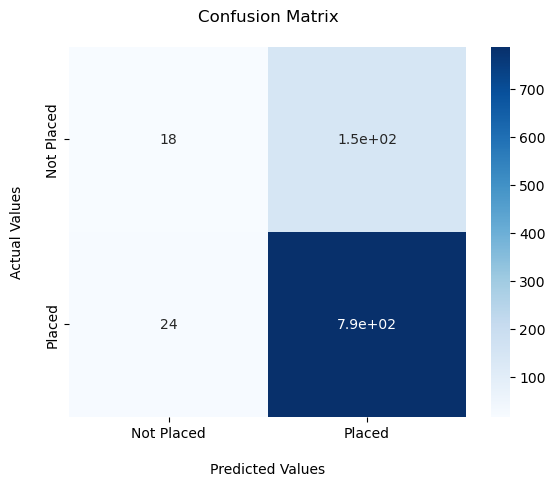

In [25]:
y_pred = xgbc.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values\n');

ax.xaxis.set_ticklabels(['Not Placed','Placed'])
ax.yaxis.set_ticklabels(['Not Placed','Placed'])

plt.show()

Finding the feature importance for XGBClassifier

In [26]:
xgbc.feature_importances_

array([0.04923012, 0.09017675, 0.0636722 , 0.06551535, 0.07053924,
       0.05949239, 0.05354981, 0.05992052, 0.04936187, 0.06268686,
       0.04638074, 0.10312427, 0.05059196, 0.04764485, 0.06414644,
       0.06396659], dtype=float32)

It is evident that each feature holds nearly equal importance in the classification

Visualising XGBoost Classifier

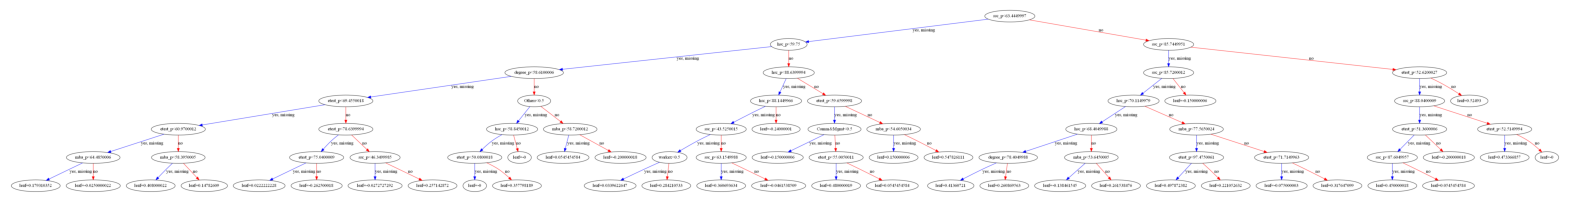

In [27]:
fig, ax = plt.subplots(figsize=(20,20))
plot_tree(xgbc, ax=ax)
plt.show()

### Conclusion

After conducting an Exploratory Data Analysis (EDA) and performing data preprocessing, we proceeded with Machine Learning Classification to predict the status based on the given features. We employed several popular models and evaluated their performance on the dataset to select the best performing model.

Among the models tested, our XGBoost Classifier stood out with an impressive F1 score of 0.83. While other models achieved the same F1 score, they did not perform as well on other evaluation parameters. Despite exhibiting some overfitting tendencies, the XGBoost Classifier demonstrated good generalization on the test set.

Our objective was not solely to maximize accuracy, but to obtain a more stable and reliable model. Therefore, we have decided to utilize the XGBoost Classifier for the task of classifying whether a student has been placed or not.